In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px

In [2]:
df15 = pd.read_csv('files//2015.csv')
df16 = pd.read_csv('files//2016.csv')
df17 = pd.read_csv('files//2017.csv')
df18 = pd.read_csv('files//2018.csv')
df19 = pd.read_csv('files//2019.csv')

In [3]:
df15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df15['Region'].unique

<bound method Series.unique of 0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object>

In [6]:
dynamics_by_region = df15[['Region','Happiness Score','Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']].groupby('Region').median()
dynamics_by_region

,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption)
Region,,,,,
Australia and New Zealand,7.285,1.291880,0.919965,0.645310,0.392795
Central and Eastern Europe,5.286,1.012160,0.731280,0.350680,0.042120
Eastern Asia,5.729,1.257675,0.920340,0.466205,0.079930
Latin America and Caribbean,6.149,0.909400,0.696060,0.519540,0.108260
Middle East and Northern Africa,5.262,1.017220,0.721090,0.347435,0.140405
North America,7.273,1.360400,0.883710,0.589505,0.244235
Southeastern Asia,5.360,0.705320,0.637930,0.556640,0.105010
Southern Asia,4.565,0.595430,0.568740,0.397860,0.097190
Sub-Saharan Africa,4.272,0.308445,0.298155,0.382910,0.103875


<Axes: title={'center': 'Топ 5 регионов по счастью населения'}, xlabel='Регион', ylabel='Оценка счастья'>

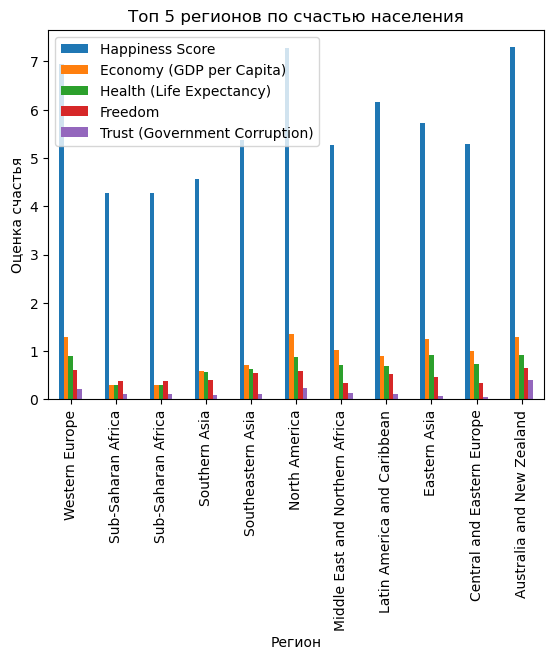

In [9]:
dynamics_by_region.loc[['Australia and New Zealand', 'Central and Eastern Europe', 'Eastern Asia', 'Latin America and Caribbean', 'Middle East and Northern Africa', 'North America', 'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa', 'Sub-Saharan Africa', 'Western Europe']].sort_values(by='Region', ascending=False).plot(kind='bar',
                                                                  title='Наглядное представление об уровне жизни',
                                                                  xlabel='Регион',
                                                                  ylabel='Оценка')

<Axes: xlabel='Region'>

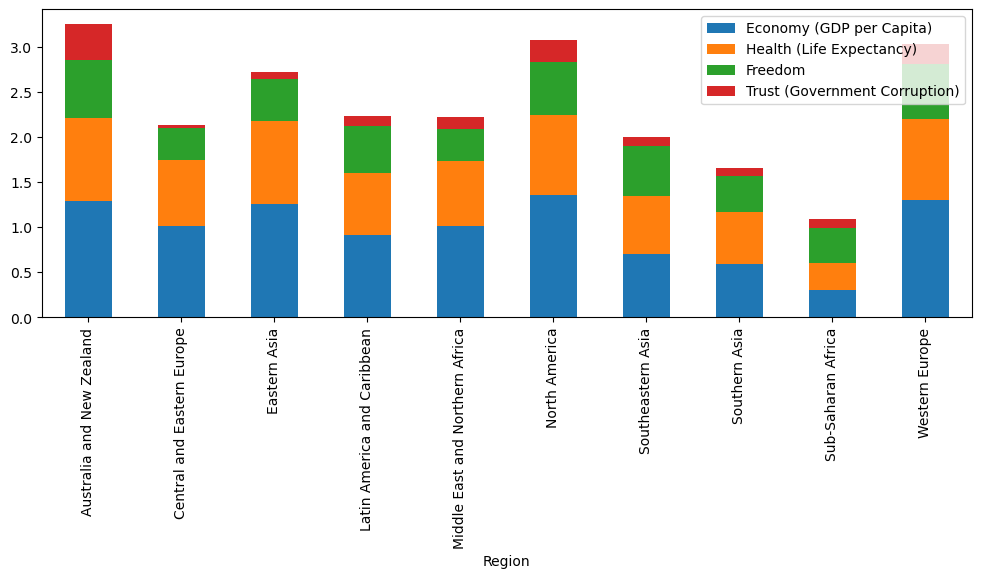

In [12]:
#По данной столбчатой накопительной диаграмме мы можем видеть общий уровень жизни в регионах. А также узнать где он больше и за счет чего.
dynamics_by_region.drop('Happiness Score', axis=1).plot(kind='bar', stacked=True, figsize=(12, 4))

<Axes: title={'center': 'Уровень счастья к экономической состовляющей'}, xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

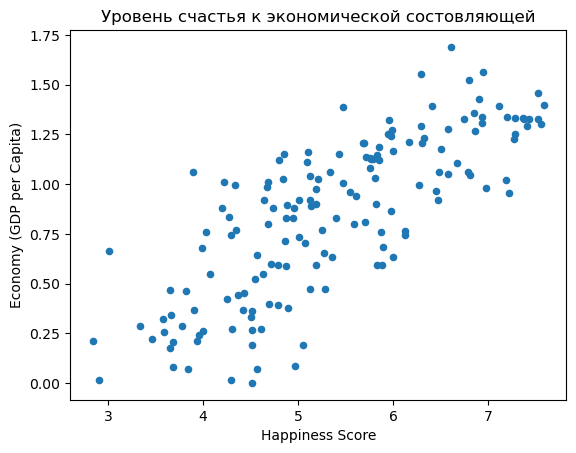

In [13]:
df15.plot(kind='scatter',
        x='Happiness Score',
        y='Economy (GDP per Capita)',
        title='Уровень счастья к экономической составляющей') 
#На данном графике можно увидеть прямую зависимость экономической состовляющей к уровню счастью жизни. Чем она больше тем больше и счастье в среднем.

In [15]:
top_region_hap = df15.groupby('Region')[['Happiness Score']].median()\
    .sort_values('Happiness Score', ascending=False)
top_region_hap.style.bar(align='mid', color='green') #Тут можно увидеть различия регионов по уровню счастья

,Happiness Score
Region,
Australia and New Zealand,7.285000
North America,7.273000
Western Europe,6.937000
Latin America and Caribbean,6.149000
Eastern Asia,5.729000
Southeastern Asia,5.360000
Central and Eastern Europe,5.286000
Middle East and Northern Africa,5.262000
Southern Asia,4.565000


Text(0.5, 1.0, 'Сравнение показателей свобод за 2015 и 2019')

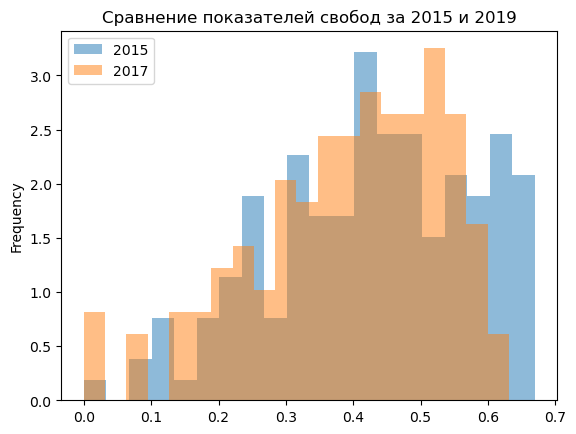

In [32]:
# сравнение 2 гистограм по показателям свобод за 2015 и 2019 год
df15['Freedom'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label='2015')

df19['Freedom to make life choices'].plot(kind='hist',
                     alpha = 0.5,
                     bins=20,
                     density = True,
                     label='2019)
plt.legend(loc='upper left')
plt.title('Сравнение показателей свобод за 2015 и 2019')
#Тут можно увидеть что в среднем по странам покатели свобод увеличились,однако максимальные значения свобод стали гораздо меньше встречатся в данных.

<Axes: >

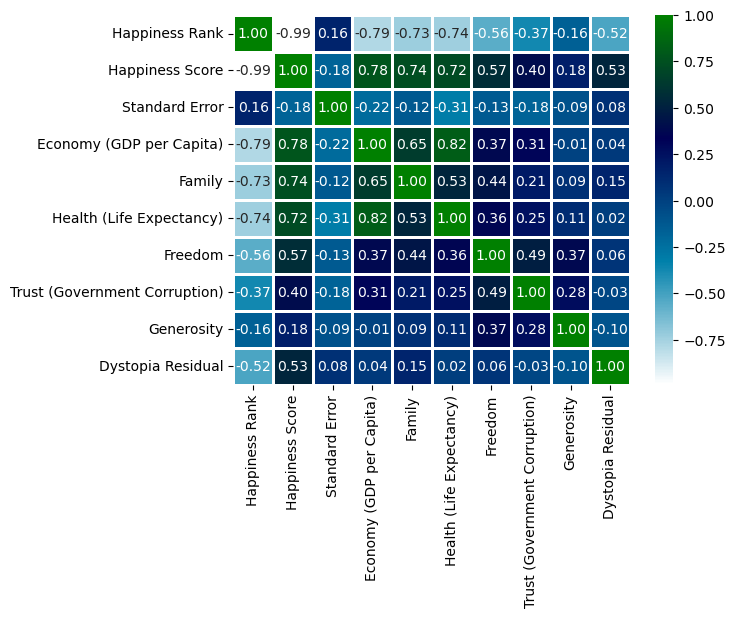

In [39]:
df15_corel = df15.drop(['Country','Region'], axis=1)    #Убрал данные значения так как они мешают в отображении корреляции
sns.heatmap(df15_corel.corr(), annot=True, linewidths=1, cmap="ocean_r", fmt=".2f")
#На данной схеме можем увидеть корреляцию значений в базе данных(Белые и Зеленые наиболее коррелирующие значения)

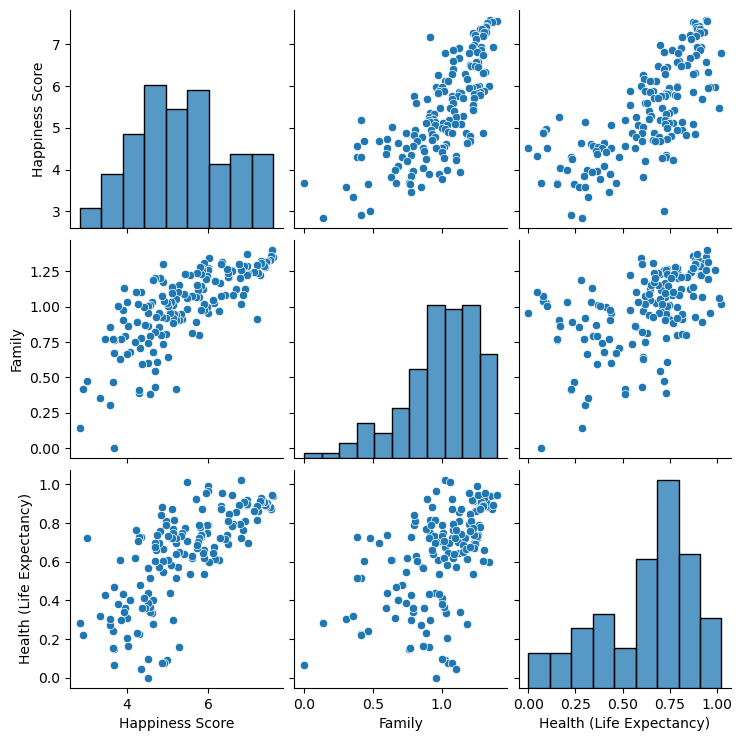

In [42]:
# sns.pairplot(df15) #Посмотрим как связаны друг с другом данные 
sns.pairplot(df15[['Happiness Score', 'Family', 'Health (Life Expectancy)']])# посмотрим как связаны наиболее коррелирующие данные. Экономику брать не стал так как показал зависимость ранее.

<Axes: >

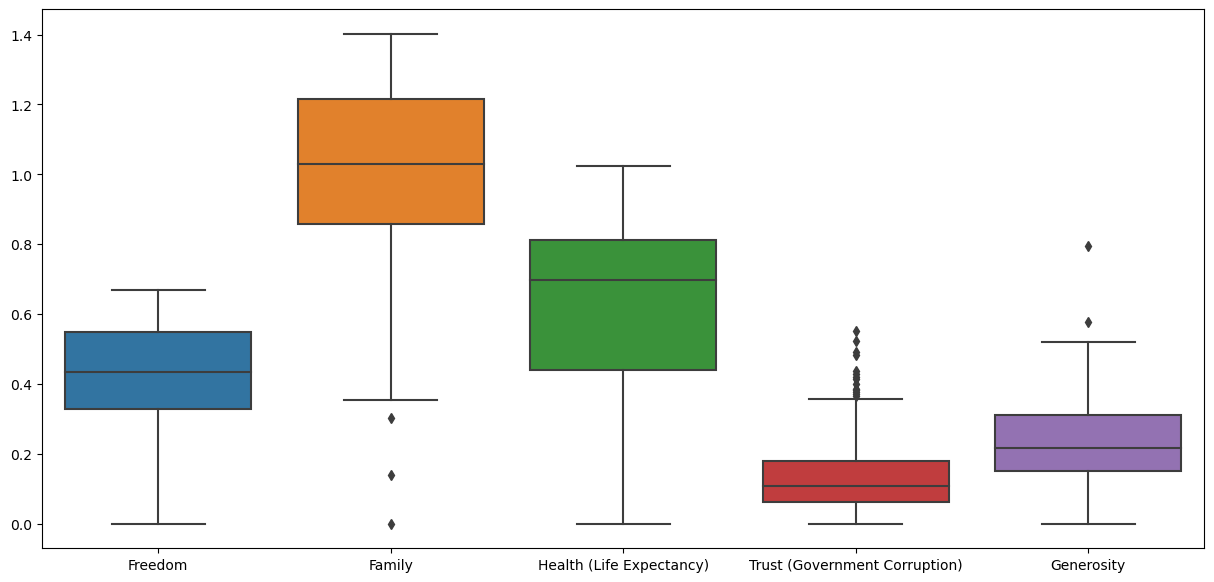

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7)) #Данная строка позволяет исправить наплыв букв друг на друга в графике
sns.boxplot(df15[['Freedom', 'Family', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Generosity']], ax=ax)
#Данная схем с boxplot позволяет увидеть выбросы а также распределение значений в выборке 15 года

In [65]:
px.scatter(data_frame = df15,
           x = 'Economy (GDP per Capita)', 
           y = 'Happiness Score', 
           animation_frame = 'Region',
           animation_group = 'Country',
           size = 'Happiness Score', 
           color = 'Country', 
           hover_name = 'Happiness Rank', 
           title = 'Happiness Scores vs GDP')
#Так же нашел как сделать более наглядную иллюстрацию отношения счастья к уровню экономики. Похожий график делал выше однако тут более нагляднее.